In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

plt.style.use(['science', 'ieee', 'no-latex'])

def plot_metric(file_path, metric, title, ylabel, colors=['salmon', 'skyblue']):
    df = pd.read_csv(file_path)
    autoscaler_false = df[df['Autoscaler'] == False]
    autoscaler_true = df[df['Autoscaler'] == True]
    nodes = df['Nodes'].unique()
    bar_width = 0.35
    index = np.arange(len(nodes))
    
    metric_false = autoscaler_false.groupby('Nodes')[metric].mean()
    metric_true = autoscaler_true.groupby('Nodes')[metric].mean()

    plt.bar(index, metric_false, bar_width, label='disabled', color=colors[0])
    plt.bar(index + bar_width, metric_true, bar_width, label='enabled', color=colors[1])
    plt.xlabel('Cluster (nodes)')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(index + bar_width / 2, nodes)
    plt.legend(title='Autoscaler', bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)
    plt.tight_layout()
    plt.show()

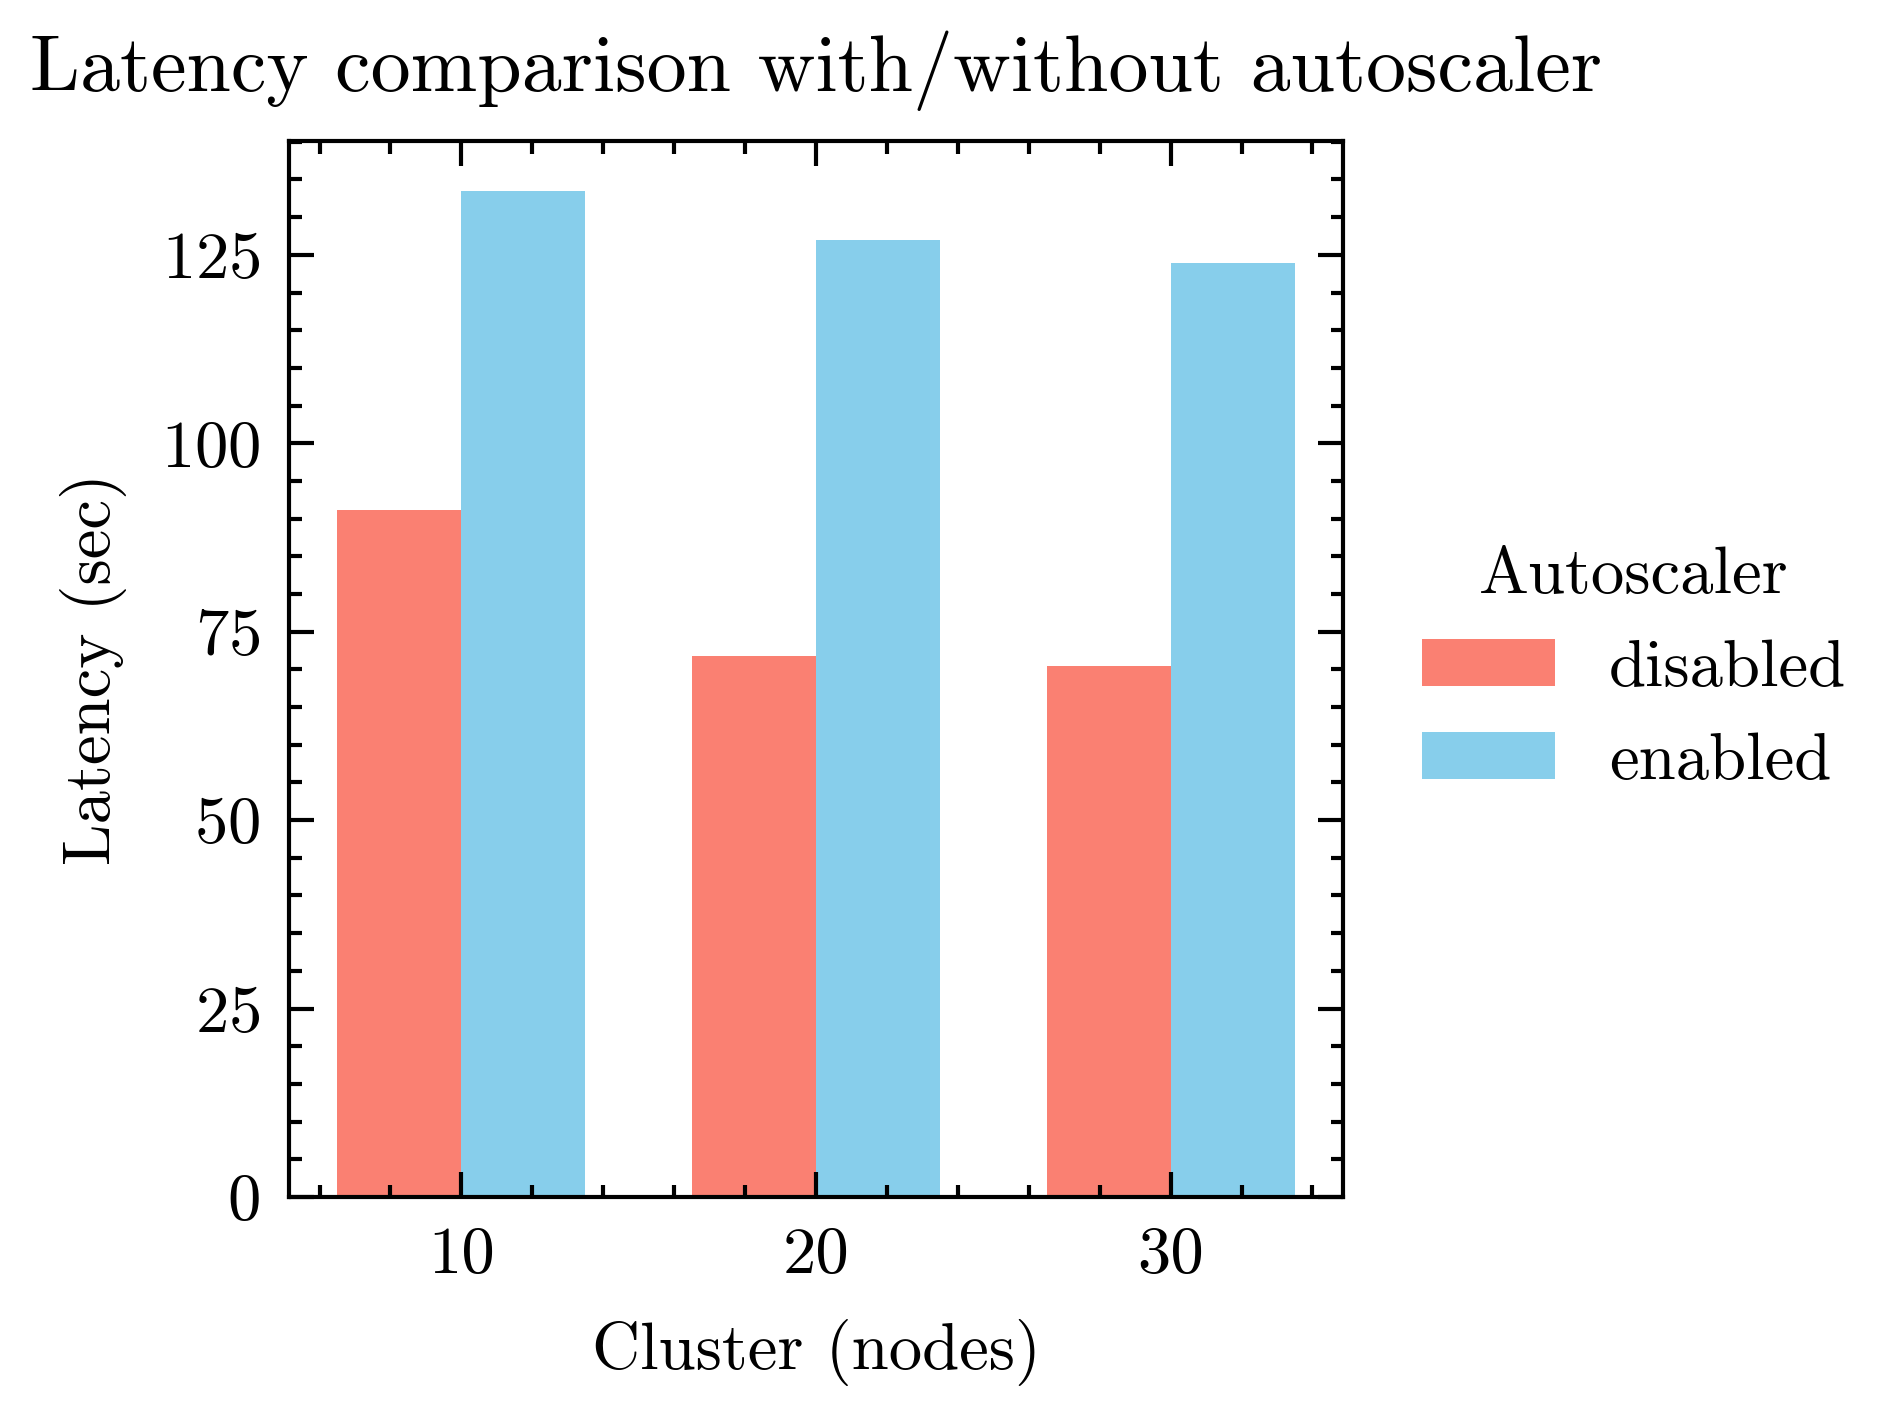

In [2]:
plot_metric(
    file_path="../files/experiment_3/metrics_embl_inference_cluster_exp3_autoscaler.csv",
    metric='Total time', 
    title='Latency comparison with/without autoscaler',
    ylabel='Latency (sec)'
)

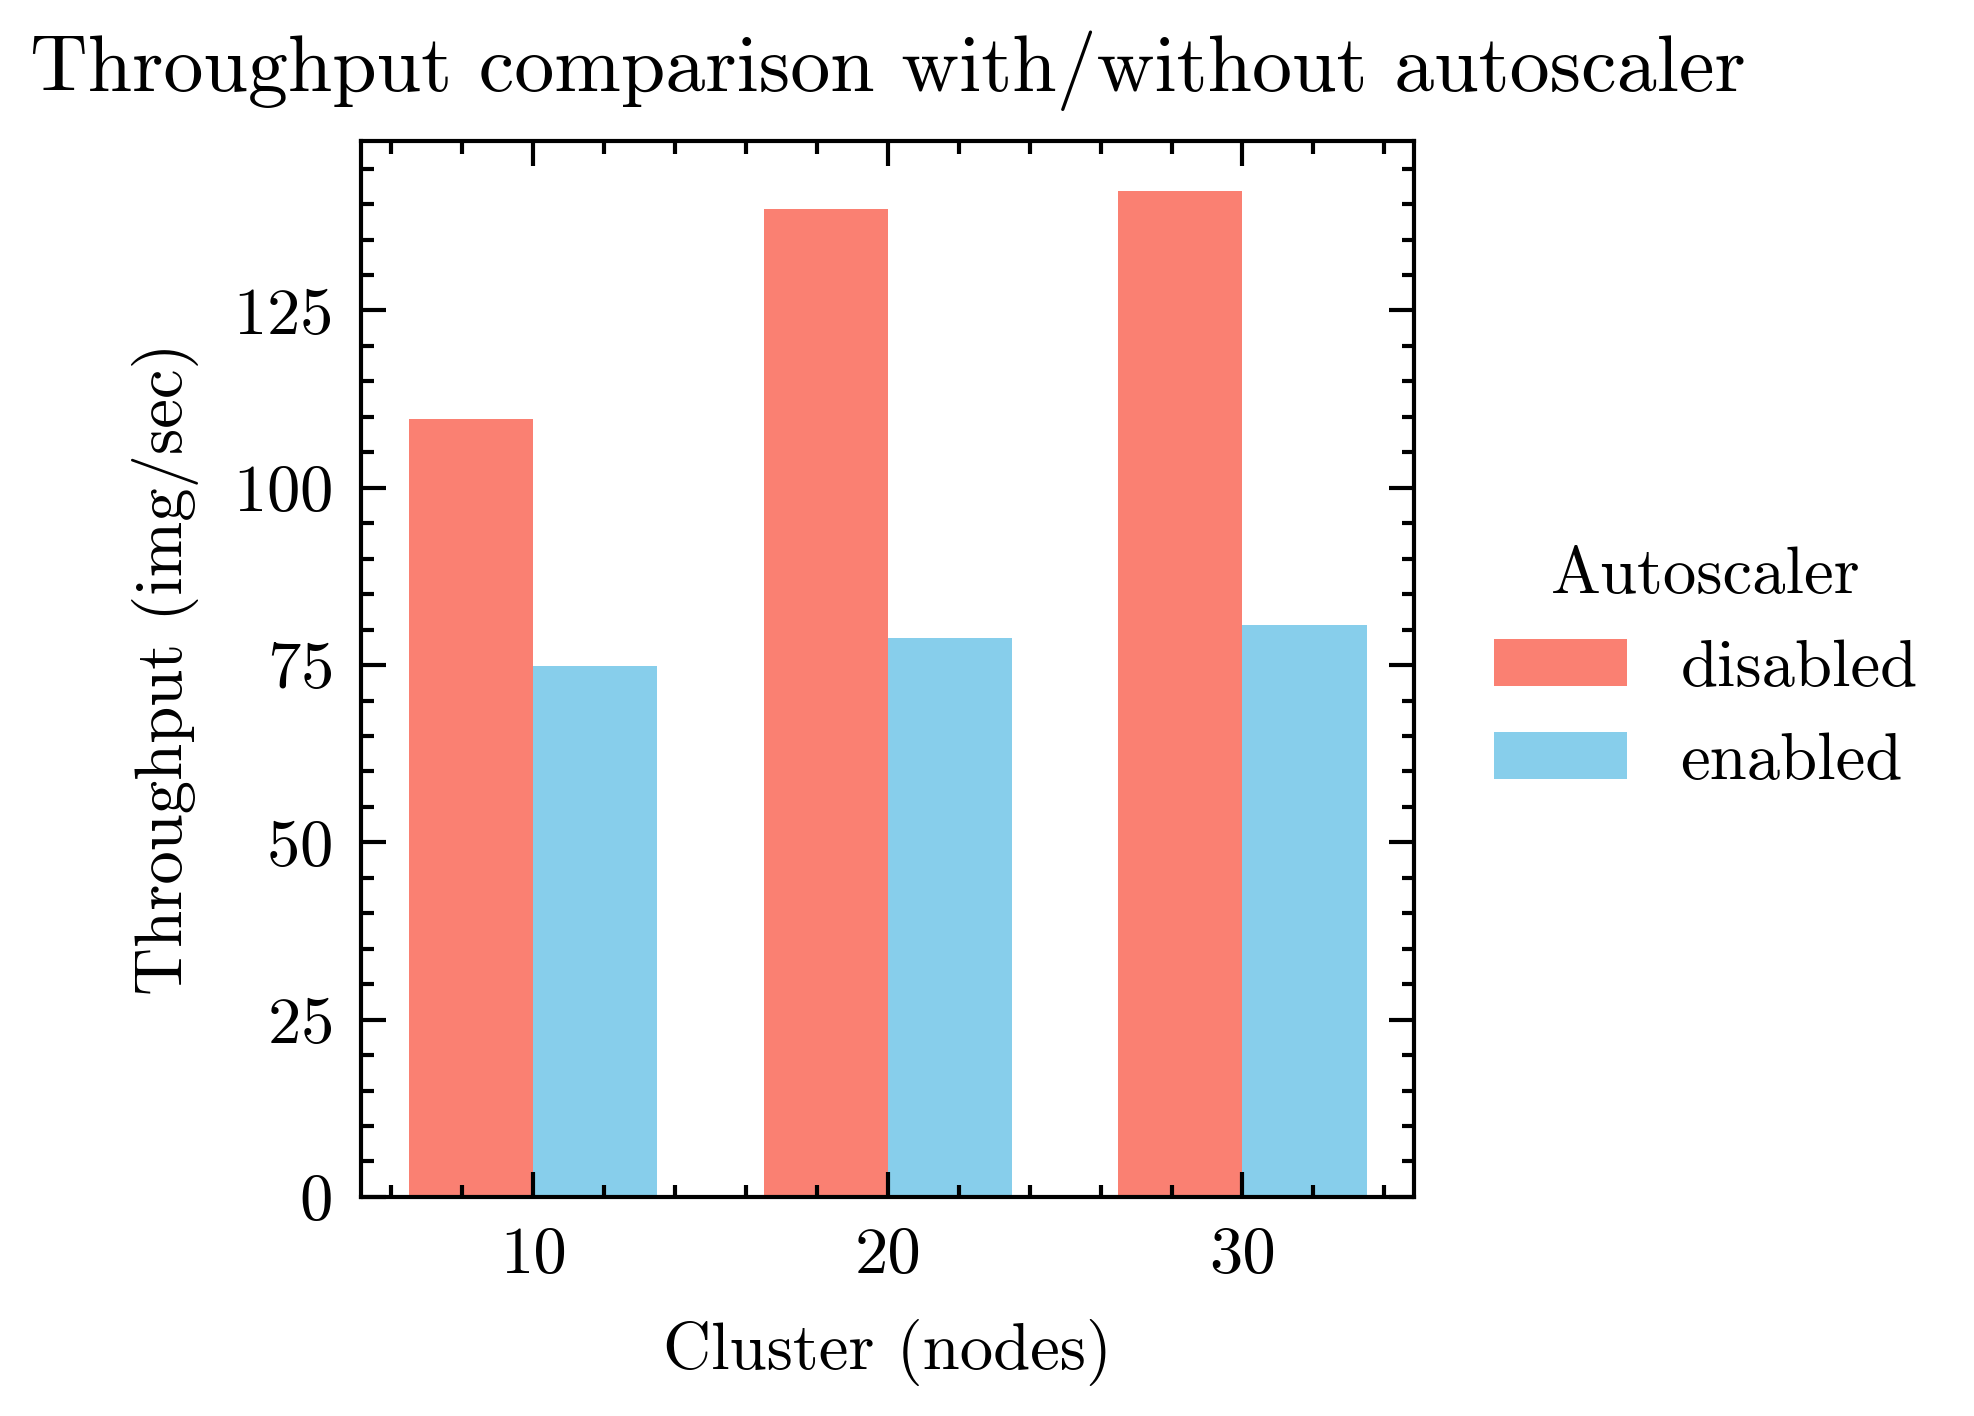

In [3]:

plot_metric(
    file_path="../files/experiment_3/metrics_embl_inference_cluster_exp3_autoscaler.csv",
    metric='Throughput (img/sec)', 
    title='Throughput comparison with/without autoscaler',
    ylabel='Throughput (img/sec)'
)